In [ ]:
import numpy as np 
import cv2
from skimage.util.shape import view_as_blocks
from sklearn.preprocessing import StandardScaler

patches=[]
patch_size=8
img = np.random.rand(256,256)
scaler = StandardScaler().fit(img)
img = scaler.transform(img)# 归一化
for block in np.reshape(view_as_blocks(img, block_shape=(patch_size, patch_size)), (-1, patch_size, patch_size)): # 将图片分割为8x8的窗口
    # np.reshape(cv2.pyrDown(cv2.pyrDown(block)), (-1,))
    patches.append(np.reshape(block[::2,::2], (-1,))) # 2次下采样，当作每隔4个采样  shape: (4,)

patches[0]

array([ 1.47470712, -0.10640484,  0.96949823,  1.20813227,  1.09097201,
       -0.35419341,  1.25946861,  1.2886719 ,  1.22492137,  0.47964654,
       -1.196787  ,  1.15942674,  0.52097022, -1.12316012, -0.00530417,
       -0.02305665])

In [ ]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)

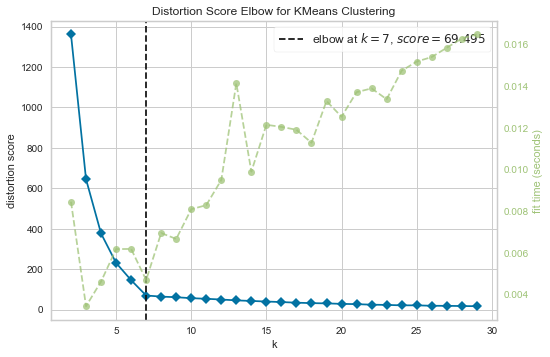

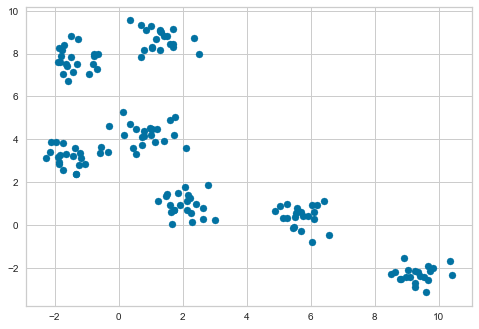

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
X,y=make_blobs(n_samples=150,
                        n_features=2,
                        centers=7,
                        cluster_std=0.5,
                        shuffle=True,
                        random_state=0)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()  
plt.scatter(X[:,0],X[:,1])

In [56]:
import numpy as np 
import cv2
from skimage.util.shape import view_as_blocks
from sklearn.preprocessing import StandardScaler

img_size=256
patches=[]
patch_size=8
img = np.random.rand(256,256)

def sliding(image, step_size, windows_size):
    patches = []
    for y in range(0,image.shape[0],step_size):
        for x in range(0,image.shape[1],step_size):
            patches.append(image[y:y+windows_size,x:x+windows_size])
    return patches

def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0]-windowSize[0], stepSize):
		for x in range(0, image.shape[1]-windowSize[1], stepSize):
			# yield the current window
			yield (image[y:y + windowSize[1], x:x + windowSize[0]])

# if img.shape != (img_size,img_size):
#     img = cv2.resize(img,(img_size,img_size))

# for block in np.reshape(view_as_blocks(img, block_shape=(patch_size, patch_size)), (-1, patch_size, patch_size)): # 将图片分割为8x8的窗口
#     # print(block)
#     patches.append(np.reshape(block[::4,::4], (-1,))) # 每隔4个采样，拉直
for patch in sliding_window(img, 1, (8,8)):
    patches.append(np.reshape(patch[::4,::4], (-1,))) # 每隔4个采样，拉直

print(np.array(patches)[0].shape)


(4,)


## 图片路径 标签获取

In [1]:

import os 
from tqdm import tqdm 

trainingDatasetPath = '../data/training'
testDatasetPath = '../data/testing'

labels = {
    'Forest':0, 
    'bedroom':1, 
    'Office':2, 
    'Highway':3, 
    'Coast':4, 
    'Insidecity':5, 
    'TallBuilding':6,
    'industrial':7,
    'Street':8, 
    'livingroom':9,
    'Suburb':10, 
    'Mountain':11, 
    'kitchen':12, 
    'OpenCountry':13, 
    'store':14
    }
trainging = []
for dirName in tqdm(os.listdir(trainingDatasetPath), desc='reading images...'):
    if(dirName.startswith('.')): continue # Ignore the .DS_Stroe
    dirFullPath = os.path.join(trainingDatasetPath, dirName)
    img_counter = 0
    for imgPath in os.listdir(dirFullPath):
        if(imgPath.startswith('.')): continue # Ignore the .DS_Stroe
        imgFullPath = os.path.join(dirFullPath, imgPath)
        trainging.append(imgFullPath + ' ' + str(labels[dirName]))
    
f=open("training.txt","w")
f.writelines('\n'.join(trainging))
f.close()

testing= []
for imgName in tqdm(os.listdir(testDatasetPath), desc='reading images...'):
    if(imgName.startswith('.')): continue # Ignore the .DS_Stroe
    dirFullPath = os.path.join(testDatasetPath, imgName)
    if(imgName.startswith('.')): continue # Ignore the .DS_Stroe
    # imgFullPath = os.path.join(dirFullPath, imgName)
    testing.append(dirFullPath)

f=open("testings.txt","w")
f.writelines('\n'.join(testing))
f.close()

reading images...: 100%|██████████| 2985/2985 [00:00<00:00, 1036080.56it/s]


初始化的学习率： 0.001


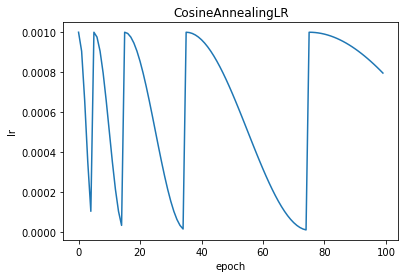

In [8]:
import torch.optim as optim
from torch.optim import lr_scheduler

import torch
import torch.nn as nn
import itertools
import matplotlib.pyplot as plt

initial_lr = 1e-3
epochs = 100
# 定义一个简单的模型
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass
if __name__ == '__main__':
    net = model()
    optimizer = torch.optim.Adam(net.parameters(), lr=initial_lr)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=5, T_mult=2, eta_min=1e-5)
    print("初始化的学习率：", optimizer.defaults['lr'])
    lr_list = []  # 保存学习率
    for epoch in range(epochs):
        # train
        optimizer.zero_grad()
        optimizer.step()
        # print("第%d个epoch的学习率：%f" % (epoch, optimizer.param_groups[0]['lr']))
        lr_list.append(optimizer.param_groups[0]['lr'])
        scheduler.step()
    # 画出lr的变化
    plt.plot(list(range(epochs)), lr_list)
    plt.xlabel("epoch")
    plt.ylabel("lr")
    plt.title("CosineAnnealingLR")
    plt.show()


In [6]:
import os

import cv2
import numpy as np
import sklearn
from scipy.cluster import vq
from skimage.util.shape import view_as_blocks
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.utils.random import sample_without_replacement
from tqdm import tqdm, trange
from yellowbrick.cluster import KElbowVisualizer

img = np.random.rand(256,256)
patch_size = 8
for block in np.reshape(view_as_blocks(img, block_shape=(patch_size, patch_size)), (-1, patch_size, patch_size)): # 将图片分割为8x8的窗口
    print(block)
    patches.append(np.reshape(block[::4,::4], (-1,))) # 每隔4个采样，拉直 （无重叠）

[[0.56261406 0.58129877 0.10668229 0.10272719 0.25786939 0.68072298
  0.36782608 0.18053894]
 [0.54443726 0.91935264 0.39752073 0.60309099 0.25094981 0.15440196
  0.60396184 0.39327286]
 [0.03580601 0.97222516 0.66680962 0.88768843 0.57945696 0.46205258
  0.22493358 0.59764709]
 [0.82573483 0.47631665 0.20262531 0.30382214 0.86256302 0.25773697
  0.06402225 0.05241632]
 [0.50031148 0.69638634 0.11785966 0.70749534 0.19727353 0.62486514
  0.04652882 0.89818607]
 [0.64793358 0.98706206 0.70372881 0.70788819 0.37080129 0.7935512
  0.0793173  0.66407485]
 [0.96208503 0.89691371 0.98384008 0.48249241 0.93933489 0.34257459
  0.4085122  0.66900334]
 [0.1356442  0.16989076 0.52244056 0.42402969 0.17023297 0.92662248
  0.16536371 0.45088312]]


NameError: name 'patches' is not defined

In [6]:
import numpy as np 
img = np.random.rand(128,256)
length = min(img.shape[0], img.shape[1])

x = img.shape[1] // 2 - length//2
y = img.shape[0] // 2 - length//2

img = img[y:y+length, x:x+length]
img.shape

(128, 128)

In [2]:
import numpy as np 
no_clusters=200
image_counter = 1500

img_hists = np.array([np.zeros(no_clusters) for _ in range(image_counter)])
img_hists.shape

(1500, 200)

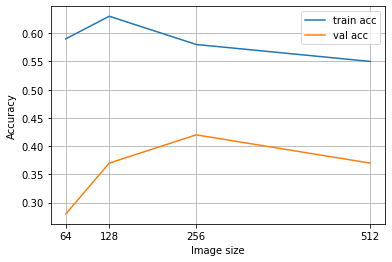

In [7]:
import matplotlib.pyplot as plt 
img_size = [64,128,256,512]
train_acc = [0.59, 0.63, 0.58, 0.55]
val_acc = [0.28, 0.37, 0.42, 0.37]

plt.plot(img_size, train_acc, label='train acc')
plt.plot(img_size, val_acc, label='val acc')
plt.xticks(ticks=img_size,)
plt.grid()
plt.xlabel("Image size")
plt.ylabel("Accuracy")
plt.legend()

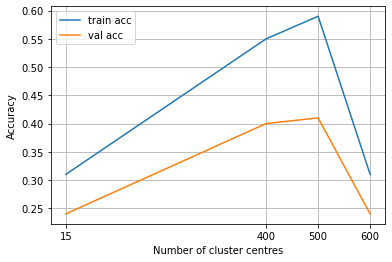

In [68]:
import matplotlib.pyplot as plt 
num_clusters = [15,400,500,600]
train_acc = [0.31, 0.55, 0.59, 0.31]
val_acc = [0.24, 0.40, 0.41, 0.24]

plt.plot(num_clusters, train_acc, label='train acc')
plt.plot(num_clusters, val_acc, label='val acc')
plt.grid()
plt.xticks(ticks=num_clusters,)
plt.xlabel("Number of cluster centres")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
import matplotlib.pyplot as plt 
times = [1,2,3]
train_acc_w = [0.91, 0.93, 0.95]
val_acc_w = [0.48, 0.69, 0.81]

train_acc_wo = [0.92, 0.96, 0.97]
val_acc_wo = [0.48, 0.82, 0.93]

plt.plot(num_clusters, train_acc, label='train acc')
plt.plot(num_clusters, val_acc, label='val acc')
plt.grid()
plt.xticks(ticks=num_clusters,)
plt.xlabel("Number of cluster centres")
plt.ylabel("Accuracy")
plt.legend()

In [66]:
import pandas as pd 
df = pd.read_csv('../cv_result.csv')
# 'linear','rbf','sigmoid','poly'
plot_csv = df[df['param_kernel'] == 'linear'][['param_C','param_gamma','mean_train_score']]
# plot_csv = df[df['param_kernel'] == 'linear'][['param_C','param_gamma','mean_test_score']]
# print(plot_csv)

#create pivot table
grid_reset = plot_csv.groupby(['param_C', 'param_gamma']).mean().reset_index()
grid_reset.columns = ['param_C', 'param_gamma', 'mean_test_score']
grid_pivot = grid_reset.pivot('param_C', 'param_gamma')

#plot 3D 
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

import plotly.graph_objects as go

fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)] )

fig.update_layout(title='Hyperparameter tuning train',
                  scene = dict(
                    xaxis_title='param_gamma',
                    yaxis_title='param_C',
                    zaxis_title='Accuracy_score'),
                  autosize=False,
                  width=650, height=650,
                  margin=dict(l=50, r=50, b=50, t=50))

fig.show()

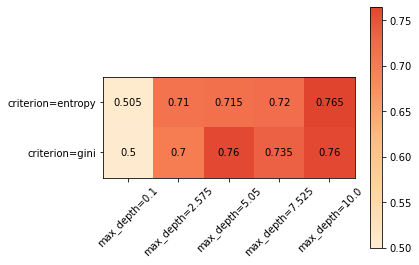

In [37]:
import numpy as np
import pandas as pd 
import sklearn.datasets as datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation import plot

data = datasets.make_classification(n_samples=200, n_features=10, n_informative=4, class_sep=0.5)


X = data[0]
y = data[1]

hyperparameters = {
    "max_depth": np.linspace(0.1,10,5),
    "criterion": ["gini", "entropy"],
    "max_features": ["sqrt", "log2"],
}

est = RandomForestClassifier(n_estimators=5)
clf = GridSearchCV(est, hyperparameters, cv=3)
clf.fit(X, y)

cv_result = pd.DataFrame.from_dict(clf.cv_results_) 
with open('test.csv','w') as f: 
    cv_result.to_csv(f)
plot.grid_search(cv_result, change=("max_depth", "criterion"), subset={"max_features": "sqrt"})


import matplotlib.pyplot as plt

plt.show()

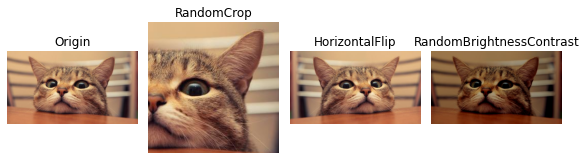

In [100]:
import albumentations as A
import cv2 
import matplotlib.pyplot as plt 

image = cv2.imread('cat.jpeg',)
# image = cv2.resize(image, (256,256), interpolation = cv2.INTER_AREA)
image = image[...,::-1]

transform1 = A.Compose([
    A.RandomCrop(width=256, height=256),
])
transform2 = A.Compose([
    A.HorizontalFlip(p=1),
])
transform3 = A.Compose([
    A.RandomBrightnessContrast(p=1),
])

plt.figure(figsize=(8,5))

ax1 = plt.subplot(1, 4, 1, frameon = False)
plt.title('Origin')
plt.xticks([])
plt.yticks([])
plt.imshow(image)

ax1 = plt.subplot(1, 4, 2, frameon = False)
transformed_image_2 = transform1(image=image)['image']
plt.title('RandomCrop')
plt.xticks([])
plt.yticks([])
plt.imshow(transformed_image_2)

ax1 = plt.subplot(1, 4, 3, frameon = False)
transformed_image_3 = transform2(image=image)['image']
plt.title('HorizontalFlip')
plt.xticks([])
plt.yticks([])
plt.imshow(transformed_image_3)

ax1 = plt.subplot(1, 4, 4, frameon = False)
transformed_image_4 = transform3(image=image)['image']
plt.title('RandomBrightnessContrast')
plt.xticks([])
plt.yticks([])
plt.imshow(transformed_image_4)
plt.subplots_adjust(wspace =0, hspace =0)#调整子图间距
plt.tight_layout()

In [108]:
Path = 'data/training'
times = 2
from tqdm import tqdm
A = []
index = 0
img_counter = 0 
for dirName in tqdm(np.arange(5), desc='reading images...'):

    class_counter = 0
    for imgPath in list(np.arange(10)):

        class_total_image = len(list(np.arange(10)))
        train_sample = int(class_total_image * 0.8) # for dataset expanding w/o ImgAug
        
        class_counter += 1 
        if class_counter >= train_sample: # testing part of image for training (w/o Image Aug)
            img_counter += 1
            A.append(index)
            index += 1
        else: # for training (w/o Image Aug)
            index += 1
            for augImg in range(times):
                img_counter += 1
                A.append(index)

print(A)



reading images...: 100%|██████████| 5/5 [00:00<00:00, 16565.18it/s]

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 9, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 17, 18, 19, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 27, 28, 29, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 37, 38, 39, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 46, 47, 47, 47, 48, 49]


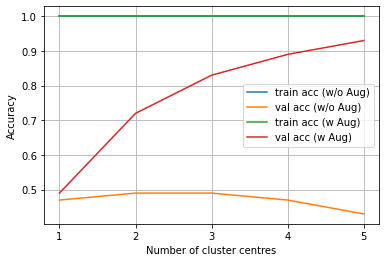

In [113]:
import matplotlib.pyplot as plt 
times = [1,2,3,4,5]
train_acc_aug = [1, 1, 1, 1, 1]
train_acc = [1, 1, 1, 1, 1]

val_acc_aug = [0.49, 0.72, 0.83, 0.89, 0.93]
val_acc = [0.47, 0.49, 0.49, 0.47, 0.43]

plt.plot(times, train_acc, label='train acc (w/o Aug)')
plt.plot(times, val_acc, label='val acc (w/o Aug)')

plt.plot(times, train_acc_aug, label='train acc (w Aug)')
plt.plot(times, val_acc_aug, label='val acc (w Aug)')

plt.grid()
plt.xticks(ticks=times,)
plt.xlabel("Number of cluster centres")
plt.ylabel("Accuracy")
plt.legend()